# **The Behavioral Risk Factor Data on Tobacco Use**

The Behavioral Risk Factor Data on Tobacco Use (2010 and Prior), provided by the Centers for Disease Control and Prevention (CDC), offers insights into tobacco use patterns in the U.S. from data collected through the State Tobacco Activities Tracking and Evaluation (STATE) System and the Behavioral Risk Factor Surveillance System (BRFSS) surveys, spanning from 1996 to 2010.

The BRFSS is a state-based, continuous surveillance system that gathers data on modifiable risk factors for chronic diseases and other major causes of death. The data from the STATE System, which was derived from the BRFSS surveys, focuses on key tobacco-related topics, such as:

* Cigarette smoking status (whether individuals currently smoke, have smoked, or have never smoked).
* Cigarette smoking prevalence across different demographic groups (age, gender, race/ethnicity, etc.).
* The frequency of cigarette smoking among those who smoke.
* The frequency and success of quit attempts by smokers.


Importantly, this data should not be compared to BRFSS data collected from 2011 onward, as the survey methodologies were altered after that year.

Source Attribution: Centers for Disease Control and Prevention, Data.gov.

**1. Import all the important libraries.**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Upload the data set under the variable 'tobdata'**

In [81]:
tobdata= pd.read_csv("Tobacco use -1969-2010.csv")

**3. Display the dataset**

In [82]:
print(tobdata)

       YEAR LocationAbbr LocationDesc                       TopicDesc  \
0      2010           AL      Alabama              Cessation (Adults)   
1      2010           AL      Alabama          Cigarette Use (Adults)   
2      2010           AL      Alabama          Cigarette Use (Adults)   
3      2010           AL      Alabama          Cigarette Use (Adults)   
4      2010           AL      Alabama          Cigarette Use (Adults)   
...     ...          ...          ...                             ...   
38045  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38046  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38047  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38048  1996           WY      Wyoming  Cigarette Consumption (Adults)   
38049  1996           WY      Wyoming              Cessation (Adults)   

              MeasureDesc  Data_Value(%)  Sample_Size  Gender       Race  \
0            Quit Smoking           53.3       

In [83]:
tobdata.head()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS


In [84]:
tobdata.tail()

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS
38049,1996,WY,Wyoming,Cessation (Adults),Quit Smoking,55.4,579.0,Male,All Races,All Ages,All Grades,BRFSS


In [85]:
###to check the size of the dataset
print(tobdata.shape)

(38050, 12)


**3. Data Cleaning**

*Using info() code to get a comprehensive overview of the dataset, this included columns, data type, null value and dimensions as viewed below.*

In [86]:
tobdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38050 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           38050 non-null  int64  
 1   LocationAbbr   38050 non-null  object 
 2   LocationDesc   38050 non-null  object 
 3   TopicDesc      38050 non-null  object 
 4   MeasureDesc    38050 non-null  object 
 5   Data_Value(%)  36091 non-null  float64
 6   Sample_Size    36041 non-null  float64
 7   Gender         38050 non-null  object 
 8   Race           38050 non-null  object 
 9   Age            38050 non-null  object 
 10  Education      38050 non-null  object 
 11  DataSource     38050 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


In [87]:
### To create the copy of dataset for further cleaning and updation
Ctobdata = tobdata.copy()

*Identifying the duplicate values and handling those values by dropping them.*

In [88]:
### To check the number of duplicate values
Dup = Ctobdata.duplicated().sum()
if Dup >0:
    print("There is",Dup,"Duplicate value")
else:
    print("No Duplicate value")

There is 3053 Duplicate value


In [89]:
### Removing Duplicate values
Ctobdata=Ctobdata.drop_duplicates()
Dup = Ctobdata.duplicated().sum()
print("After treating duplicates, there are",Dup,"duplicate values")

After treating duplicates, there are 0 duplicate values


*Identifying the null values and imputing the null values using mean.*

In [90]:
###To check the number of null values and fill the null values
Null_value=Ctobdata.isnull().sum()
print("There are",Null_value,"Null Values")
Null_mean=Ctobdata.isnull().mean() * 100
Null_mean

There are YEAR                0
LocationAbbr        0
LocationDesc        0
TopicDesc           0
MeasureDesc         0
Data_Value(%)    1311
Sample_Size      1361
Gender              0
Race                0
Age                 0
Education           0
DataSource          0
dtype: int64 Null Values


YEAR             0.000000
LocationAbbr     0.000000
LocationDesc     0.000000
TopicDesc        0.000000
MeasureDesc      0.000000
Data_Value(%)    3.746035
Sample_Size      3.888905
Gender           0.000000
Race             0.000000
Age              0.000000
Education        0.000000
DataSource       0.000000
dtype: float64

In [91]:
tob_filled = Ctobdata.fillna(0)
Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean(),inplace=True)
Ctobdata['Sample_Size'].fillna(Ctobdata['Sample_Size'].mean(),inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_19468\1113718492.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ctobdata['Data_Value(%)'].fillna(Ctobdata['Data_Value(%)'].mean(),inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19468\1113718492.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [92]:
###Null value check after imputing and treating the null value
Ctobdata.isnull().sum()

YEAR             0
LocationAbbr     0
LocationDesc     0
TopicDesc        0
MeasureDesc      0
Data_Value(%)    0
Sample_Size      0
Gender           0
Race             0
Age              0
Education        0
DataSource       0
dtype: int64

*Checking for Garbage Values and Their Frequency*

In [93]:
###check garbage values (unique value and its frequency)
for column in Ctobdata.select_dtypes(include="object").columns:
    print(f"{Ctobdata[column].value_counts()}\n")

LocationAbbr
CA    675
WA    675
MN    674
NV    674
TX    673
AK    673
MI    673
OK    672
FL    672
OR    671
AZ    671
MA    671
NY    671
NM    670
NJ    670
NC    670
MD    670
PA    668
RI    668
VA    668
KS    668
IN    668
WI    667
CO    666
CT    666
MO    666
LA    664
GA    664
NE    664
OH    663
SC    663
DE    663
IL    663
AR    659
ID    658
UT    658
AL    655
IA    654
DC    653
KY    651
MS    650
MT    649
NH    649
SD    647
VT    647
HI    647
WY    646
TN    645
WV    644
ND    640
ME    638
PR    555
VI    369
GU    259
US     50
Name: count, dtype: int64

LocationDesc
California                         675
Washington                         675
Minnesota                          674
Nevada                             674
Texas                              673
Alaska                             673
Michigan                           673
Oklahoma                           672
Florida                            672
Oregon                             671
Arizona

In [94]:
### Cleaned dataset displayed
Ctobdata

,YEAR,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,Data_Value(%),Sample_Size,Gender,Race,Age,Education,DataSource
0,2010,AL,Alabama,Cessation (Adults),Quit Smoking,53.3,659.0,Female,All Races,All Ages,All Grades,BRFSS
1,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.7,5234.0,Female,All Races,All Ages,All Grades,BRFSS
2,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,18.6,1197.0,Female,All Races,18 to 44 Years,All Grades,BRFSS
3,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.5,5349.0,Female,White,All Ages,All Grades,BRFSS
4,2010,AL,Alabama,Cigarette Use (Adults),Occasional smoker,21.8,104.0,Female,Hispanic,All Ages,All Grades,BRFSS
...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,54.0,207.0,Male,All Races,All Ages,All Grades,BRFSS
38046,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,28.2,207.0,Male,All Races,All Ages,All Grades,BRFSS
38047,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,20.8,516.0,Male,All Races,All Ages,All Grades,BRFSS
38048,1996,WY,Wyoming,Cigarette Consumption (Adults),Smoking addict,13.9,309.0,Female,All Races,All Ages,All Grades,BRFSS


In [95]:
###To check the null value, datatype, number of columns and number of rows of the cleaned dataset.
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


**4. Exploratory Data Analysis(EDA)**

*Performing the statistical analysis*

In [96]:
Ctobdata.describe(include='number').round(2).style.background_gradient()

,YEAR,Data_Value(%),Sample_Size
count,34997.000000,34997.000000,34997.000000
mean,2002.760000,33.180000,1764.450000
std,4.360000,18.140000,2460.490000
min,1996.000000,0.000000,50.000000
25%,1999.000000,20.300000,391.000000
50%,2003.000000,26.900000,988.000000
75%,2007.000000,46.500000,2076.000000
max,2010.000000,95.200000,42835.000000


*Histplot plotted for every values of the columns to see distrubution of data*

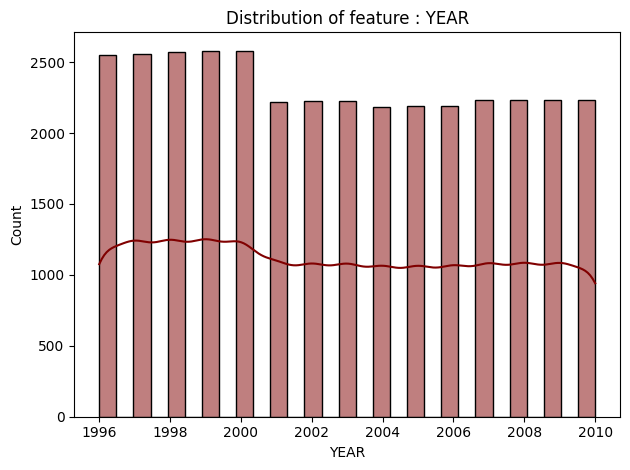

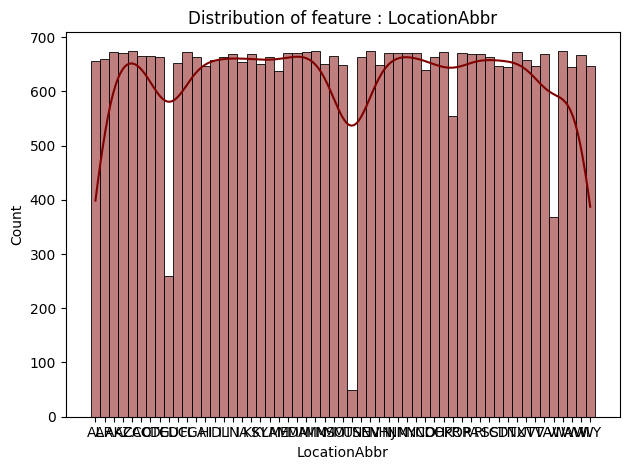

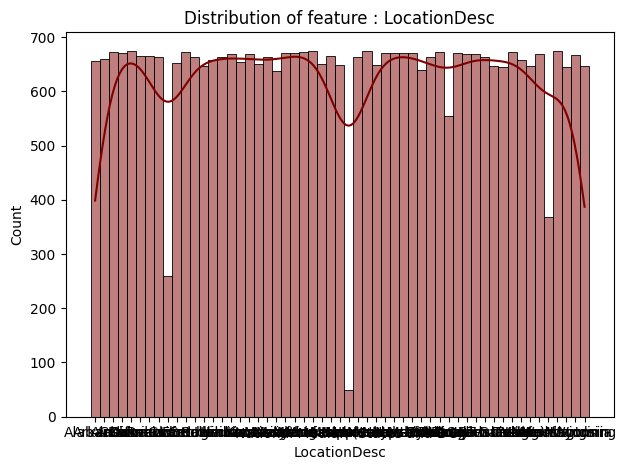

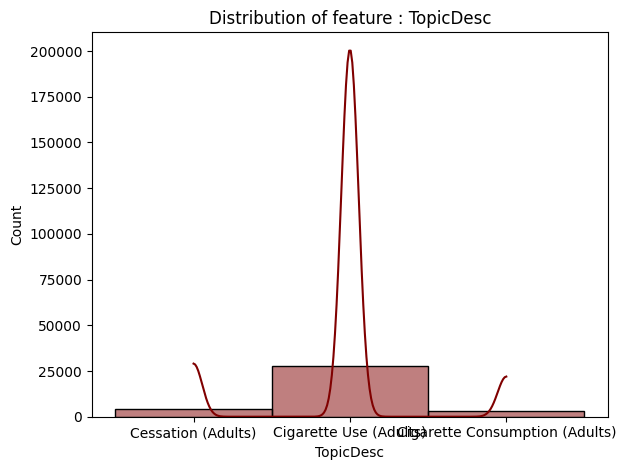

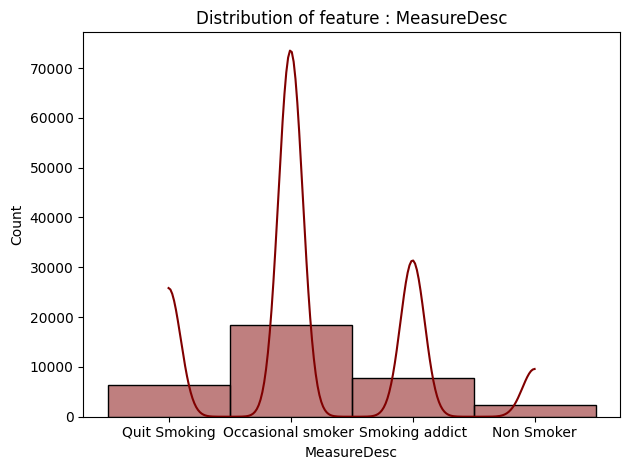

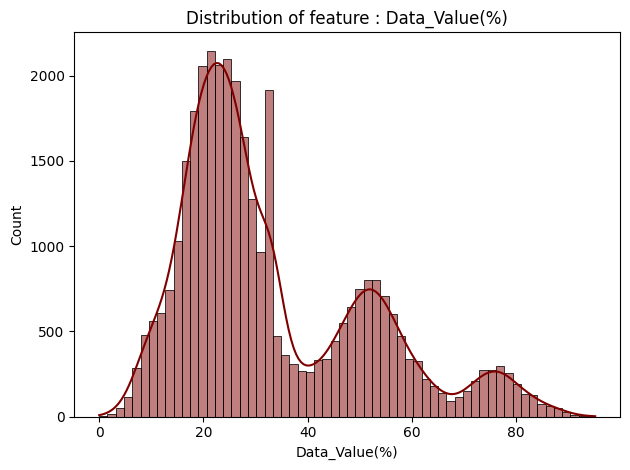

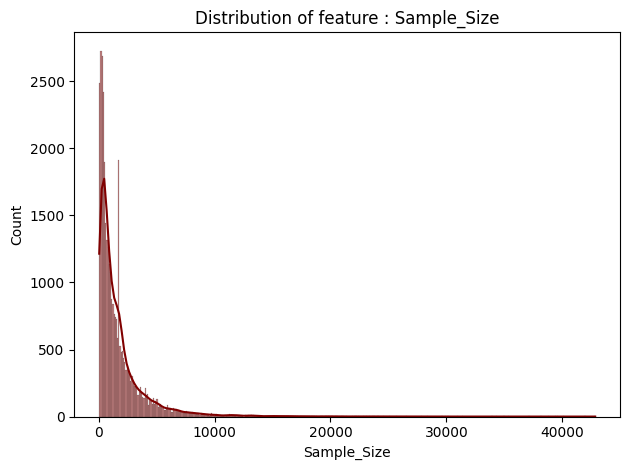

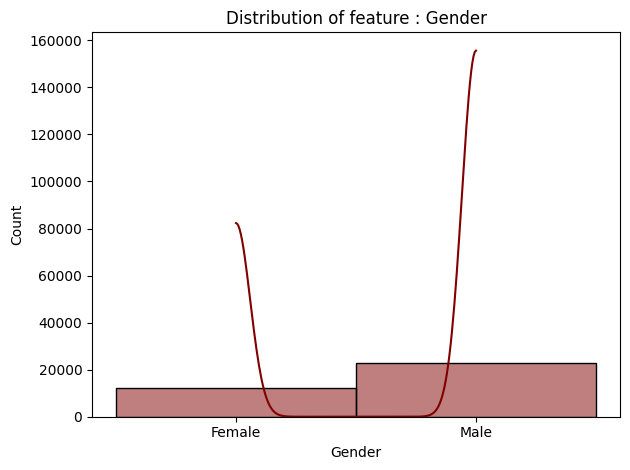

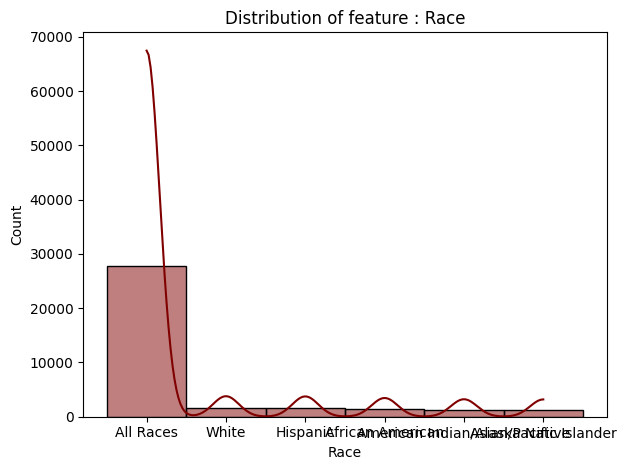

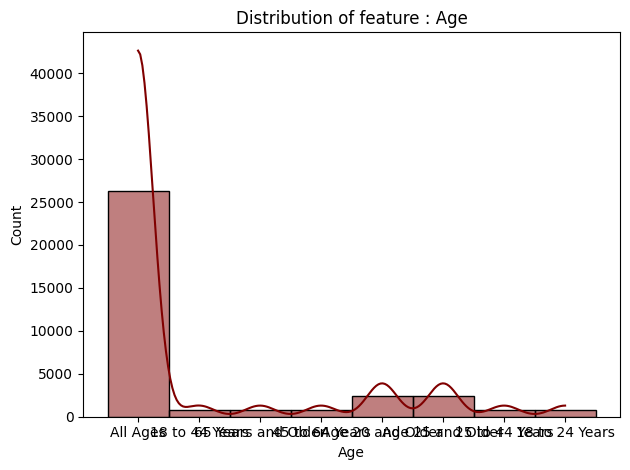

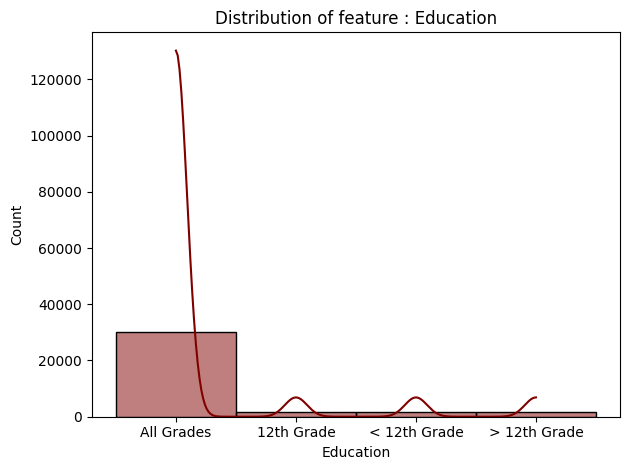

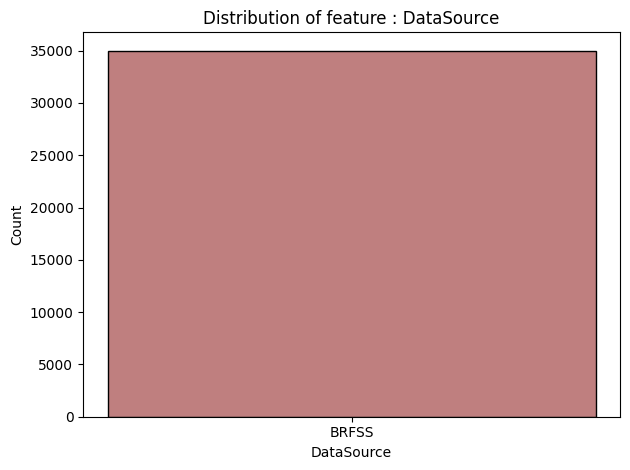

In [97]:
for column in Ctobdata.columns:
    sns.histplot(data=Ctobdata, x=column, kde=True, color='maroon')
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

*Ploting the numerical value in hisplot*

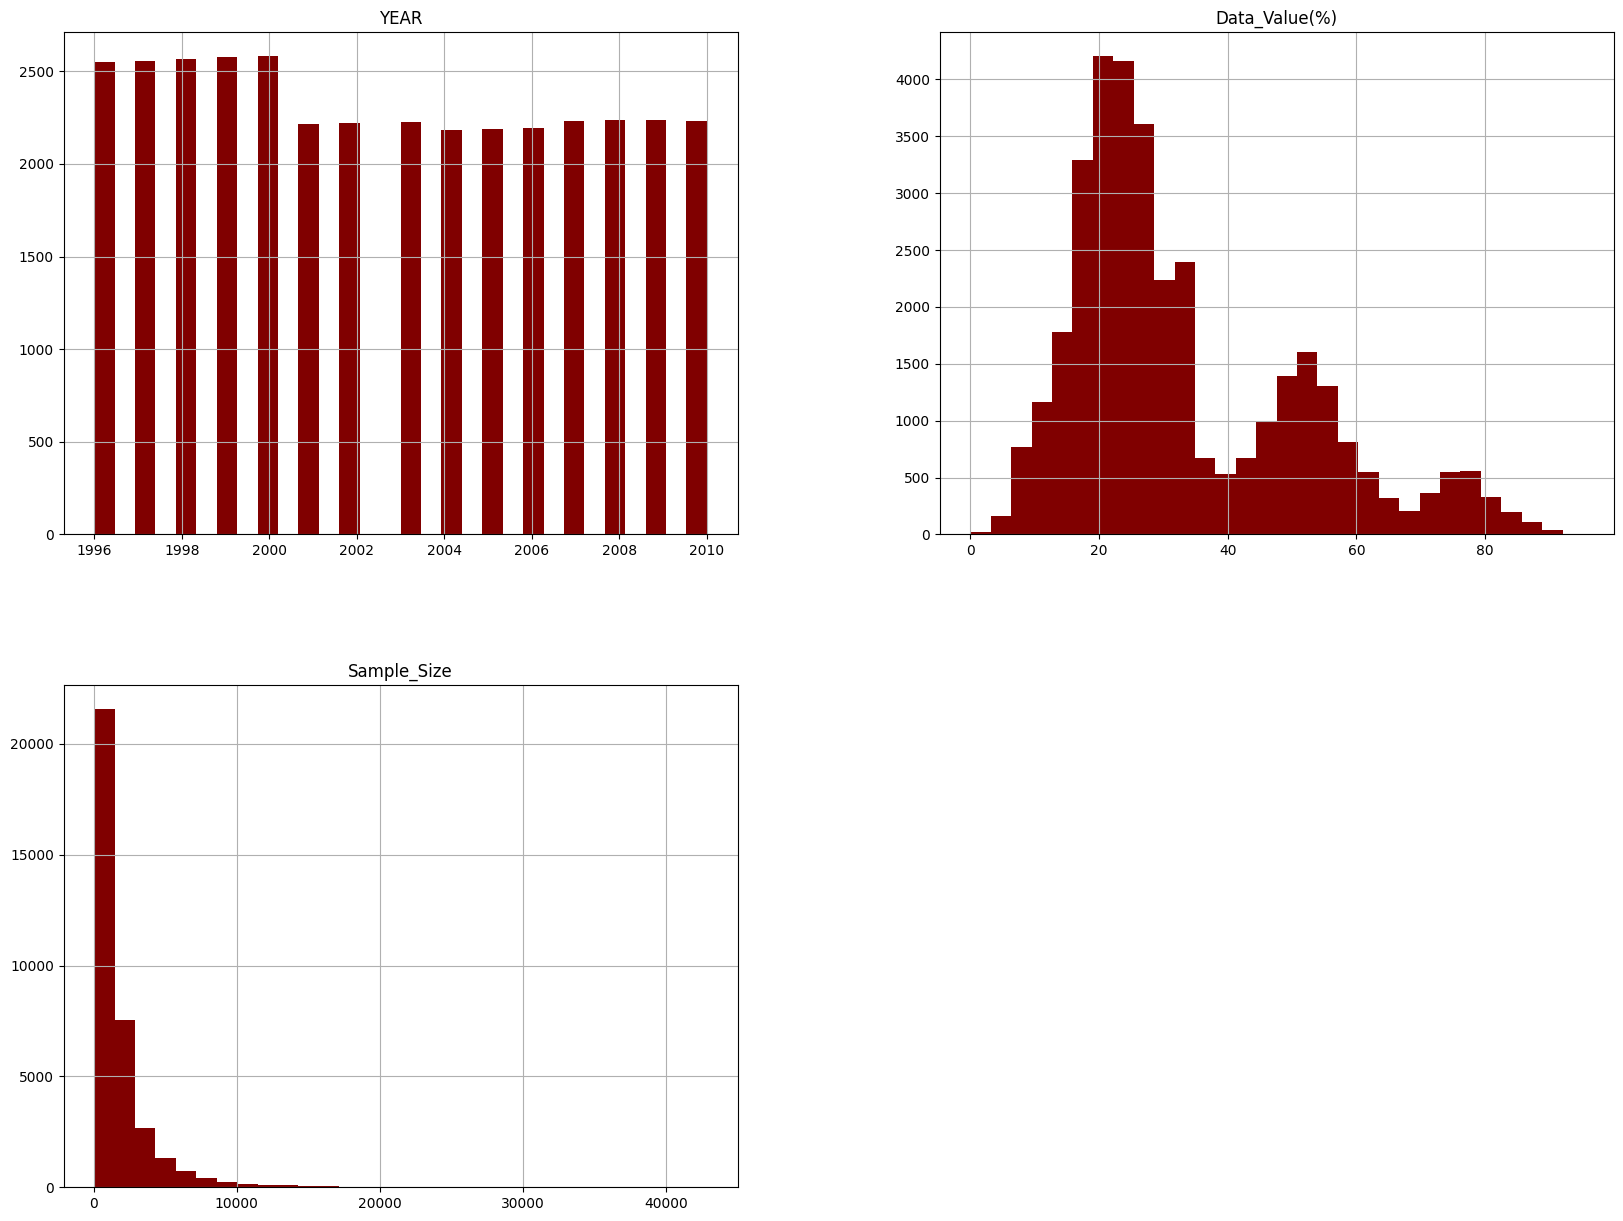

In [98]:
Ctobdata.hist(bins=30, figsize=(20, 15),color='maroon')
plt.show()

*Plotting the object values in pairplot.*

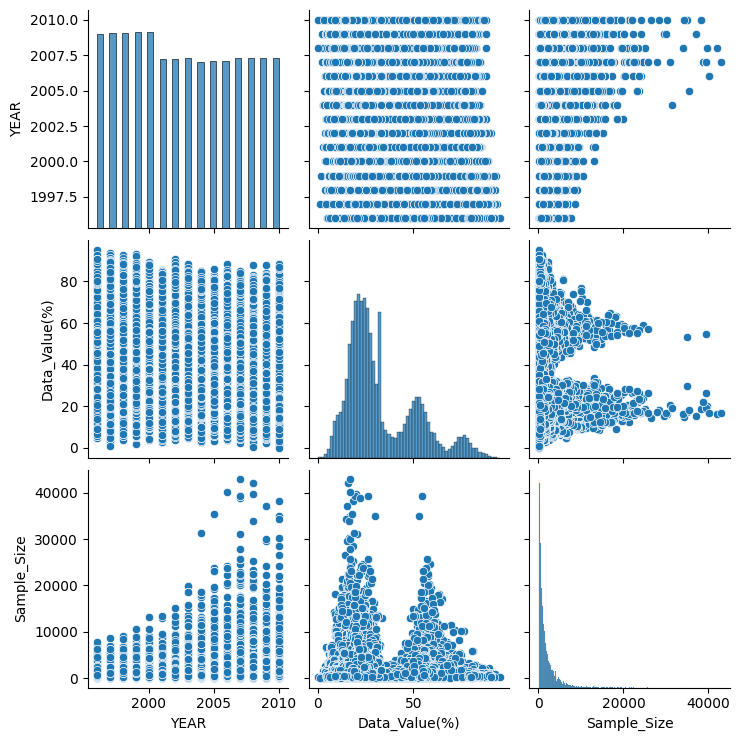

In [99]:
ax = sns.pairplot(Ctobdata[Ctobdata.select_dtypes(exclude=['object']).columns])

*Plotting the Bar graph to understand the target value.*

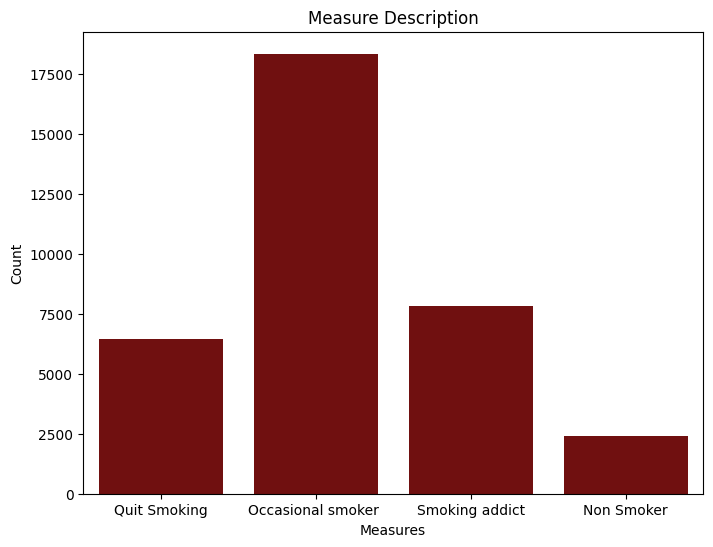

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(x="MeasureDesc",data=Ctobdata,color='maroon')
plt.title('Measure Description')
plt.xlabel('Measures')
plt.ylabel('Count')
plt.show()

*Finding and handling the outliers of the dataset*

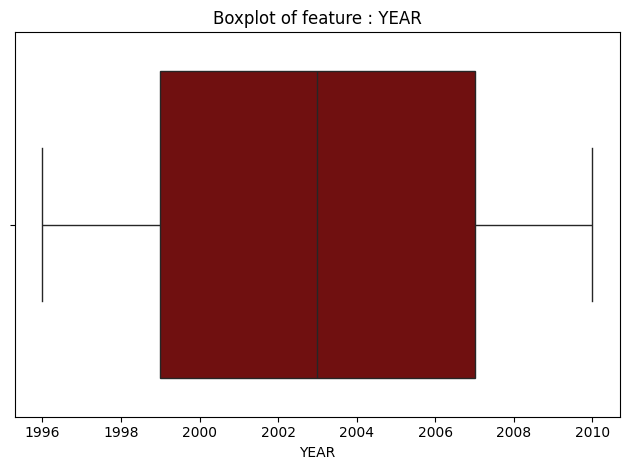

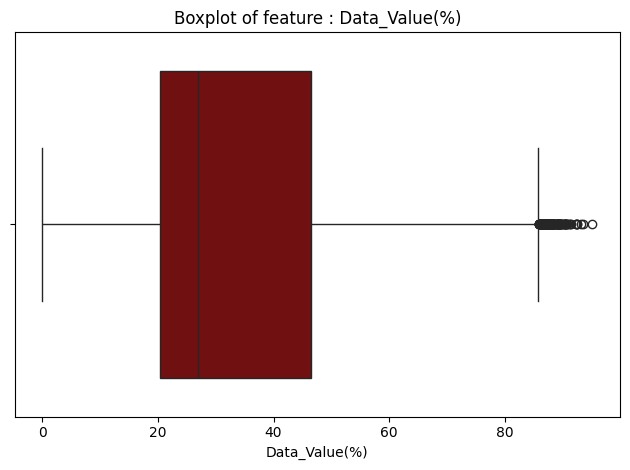

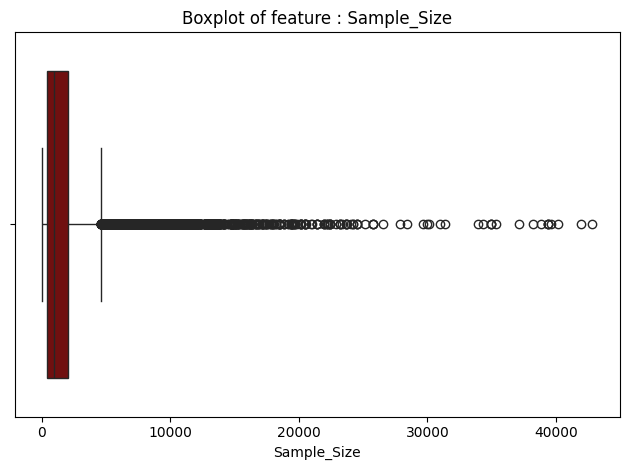

In [101]:
### Outlier detection using boxplot
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column,color='maroon')
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [102]:
###Treating outliers with IQR formula
col_list = list(Ctobdata.describe().columns)
print(col_list)
for ftr in col_list:
  print(ftr,'\n')
  q_25= np.percentile(Ctobdata[ftr], 25)
  q_75 = np.percentile(Ctobdata[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in Ctobdata[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    Ctobdata[ftr] =  Ctobdata.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

### The code does not remove outliers completely;it replaces outlier values with the upper or lower bounds determined by the IQR.This is a form of outlier treatment, where extreme values are "capped

['YEAR', 'Data_Value(%)', 'Sample_Size']
YEAR 

Percentiles: 25th=1999.000, 75th=2007.000, IQR=8.000

lower = 1987.0 and upper = 2019.0 
 
Identified outliers: 0

-------

Data_Value(%) 

Percentiles: 25th=20.300, 75th=46.500, IQR=26.200

lower = -18.999999999999996 and upper = 85.8 
 
Identified outliers: 148
Data_Value(%) Outliers Removed

-------

Sample_Size 

Percentiles: 25th=391.000, 75th=2076.000, IQR=1685.000

lower = -2136.5 and upper = 4603.5 
 
Identified outliers: 2901
Sample_Size Outliers Removed

-------



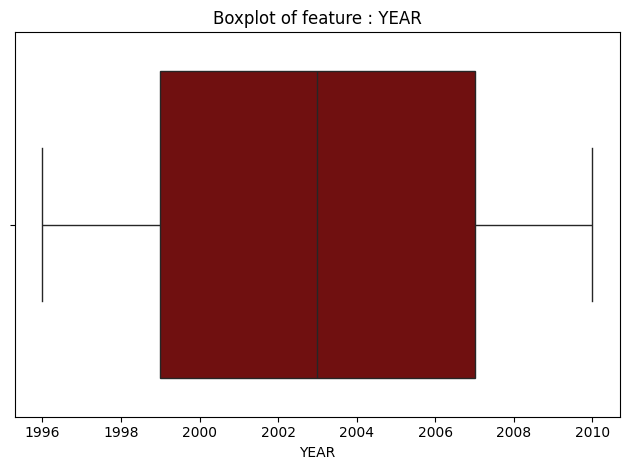

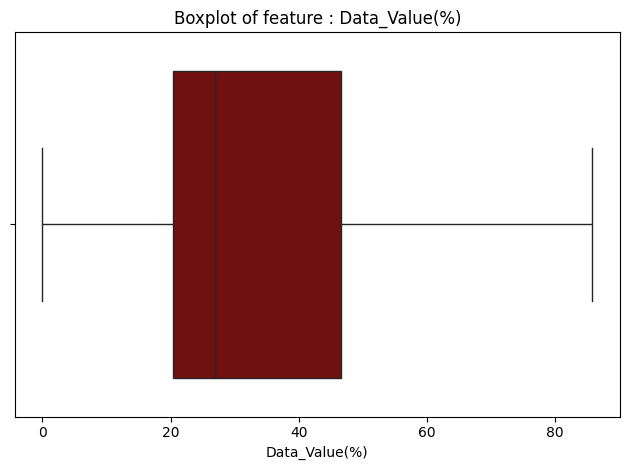

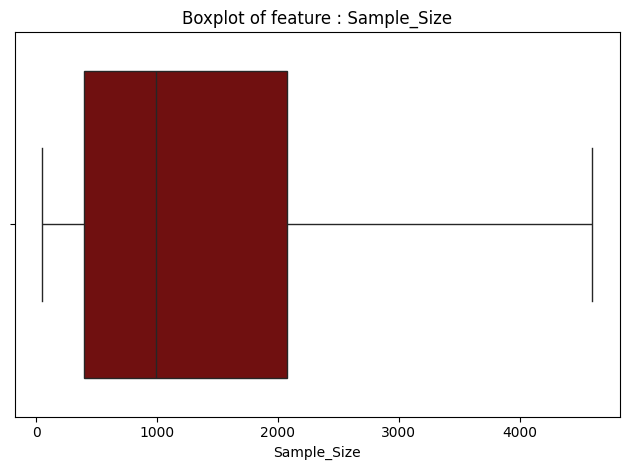

In [103]:
###Boxplot after treating outliers.
for column in Ctobdata.select_dtypes(include="number").columns:
    if column == "MeasureDesc":
        continue
    sns.boxplot(data=Ctobdata, x=column,color='maroon')
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

In [104]:
Ctobdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34997 entries, 0 to 38049
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           34997 non-null  int64  
 1   LocationAbbr   34997 non-null  object 
 2   LocationDesc   34997 non-null  object 
 3   TopicDesc      34997 non-null  object 
 4   MeasureDesc    34997 non-null  object 
 5   Data_Value(%)  34997 non-null  float64
 6   Sample_Size    34997 non-null  float64
 7   Gender         34997 non-null  object 
 8   Race           34997 non-null  object 
 9   Age            34997 non-null  object 
 10  Education      34997 non-null  object 
 11  DataSource     34997 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.5+ MB


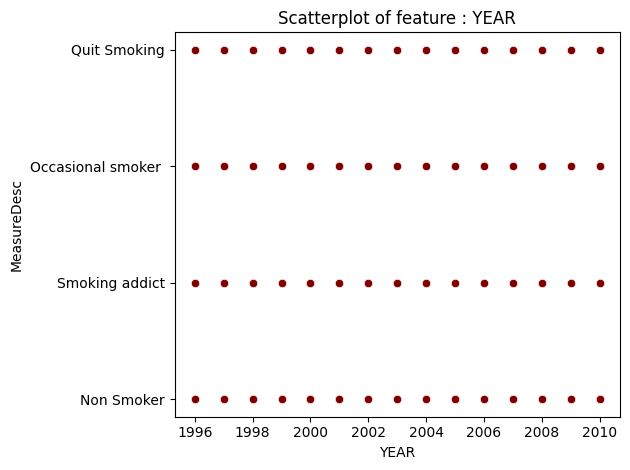

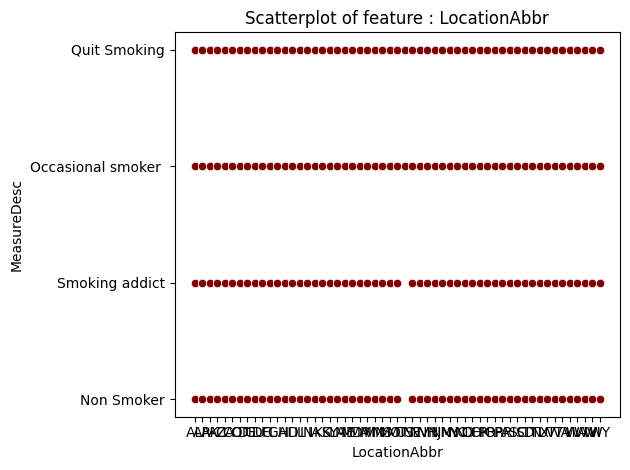

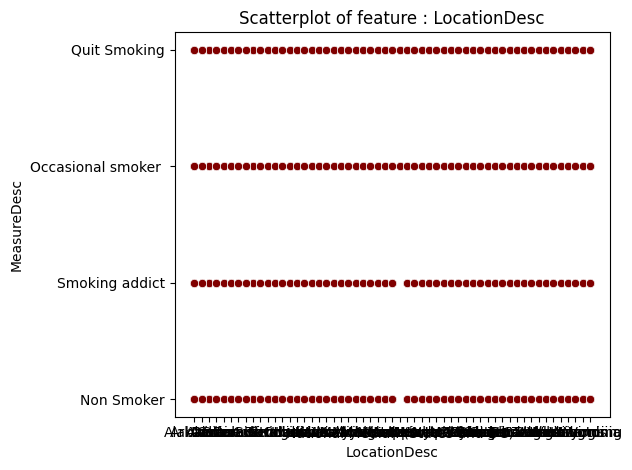

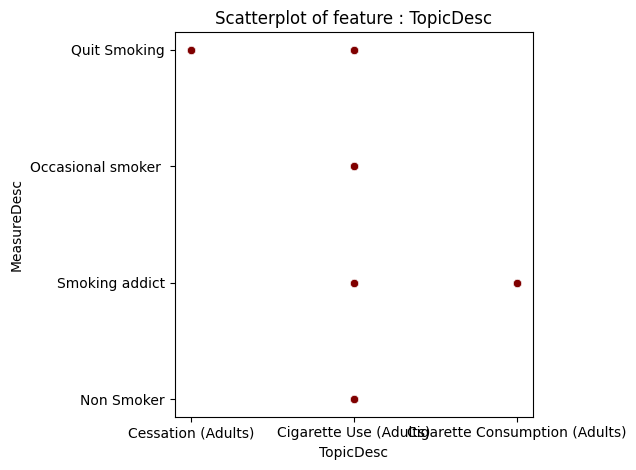

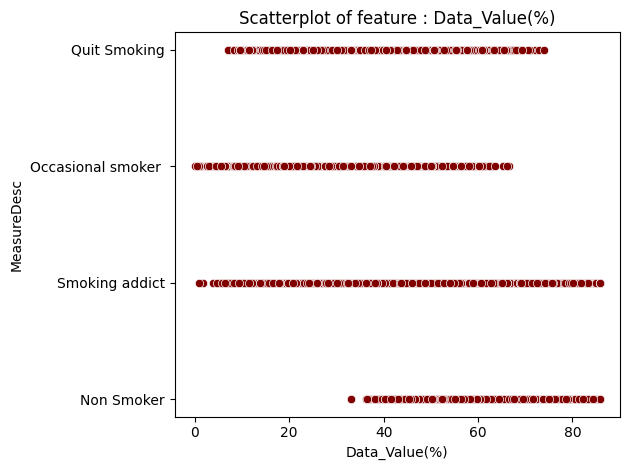

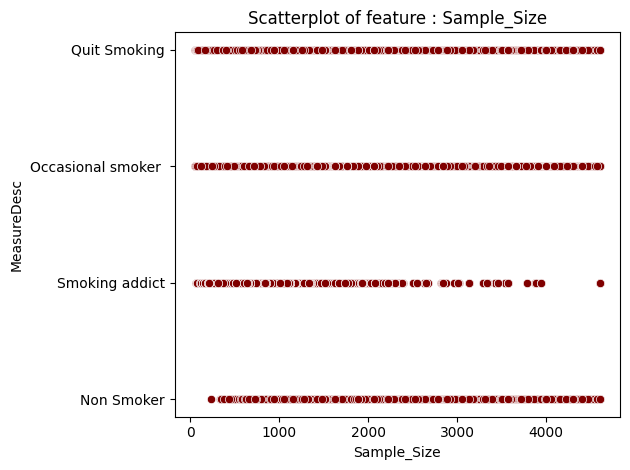

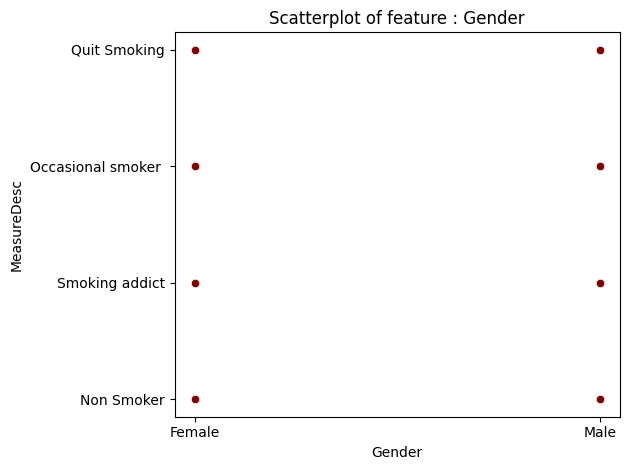

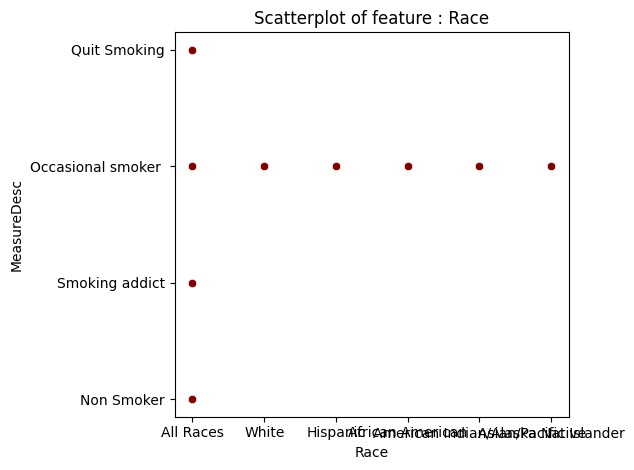

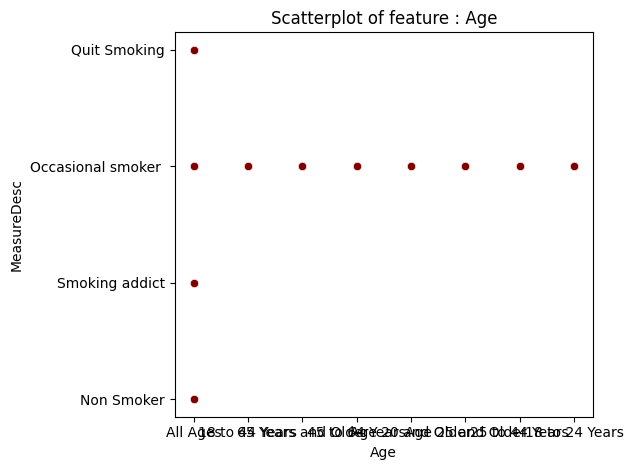

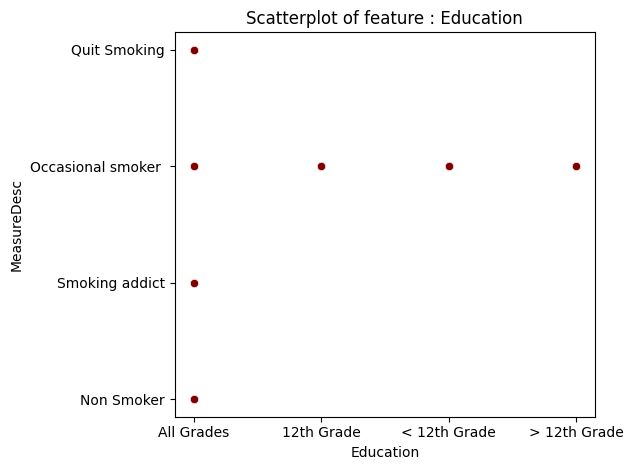

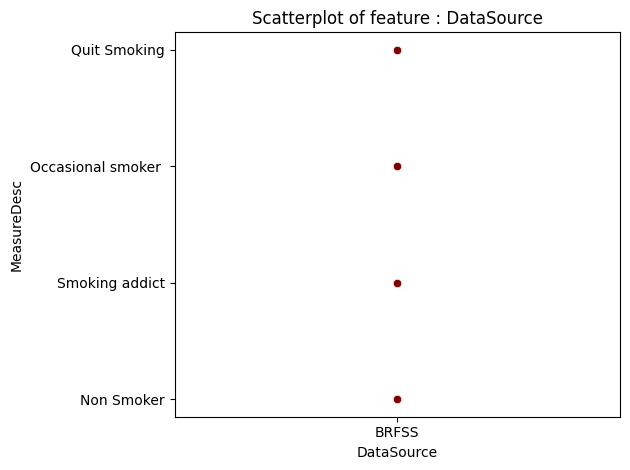

In [105]:
### To display the relation between X values and Y, where Y is tagret value ( MeasureDesc).
plt.show()

for column in Ctobdata.columns:
    if column == "MeasureDesc":
        continue
    sns.scatterplot(data=Ctobdata, x=column, y="MeasureDesc",color='maroon')
    plt.title(f"Scatterplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")


*Finding the Correlation of the Dataset*

In [106]:
correlation_matrix = Ctobdata.select_dtypes(include="number").corr()
correlation_matrix

,YEAR,Data_Value(%),Sample_Size
YEAR,1.000000,0.018912,0.315718
Data_Value(%),0.018912,1.000000,-0.115097
Sample_Size,0.315718,-0.115097,1.000000


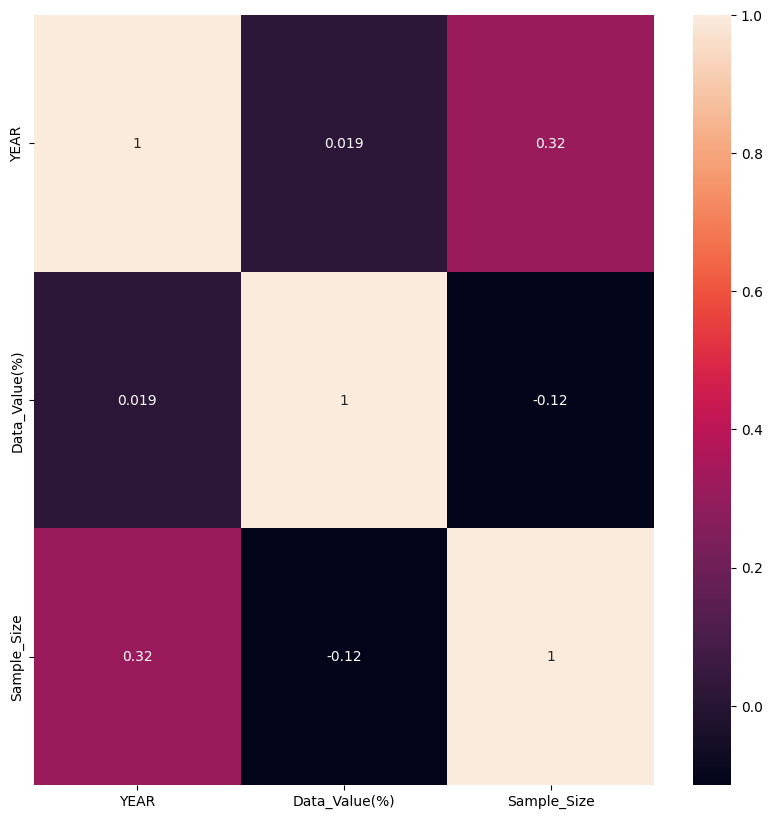

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True) # draw heatmap
plt.show()

**5 . Data Encoding**

In [108]:
###Adding all object valued columns in one variable to make it easier to navigate.
columns = ['LocationAbbr', 'LocationDesc', 'TopicDesc', 'MeasureDesc', 'Gender', 'Race', 'Age', 'Education', 'DataSource'] # define categorical columns


*Explanation: pd.get_dummies() automatically creates new columns for each unique category within a categorical variable.For each category, a binary value (0 or 1) is assigned to indicate the presence or absence of that category in the original data.*

In [109]:
encoded_tdf = pd.get_dummies(Ctobdata, columns=columns, dtype=int) # encode categorical columns
encoded_tdf


,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_45 to 64 Years,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS
0,2010,53.3,659.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1,2010,18.7,4603.5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,2010,18.6,1197.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2010,21.5,4603.5,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,2010,21.8,104.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,207.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38046,1996,28.2,207.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38047,1996,20.8,516.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
38048,1996,13.9,309.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [110]:
### Merged the target variable from the Ctobdata and encoded_tdf to df_concat.
df_concat = pd.concat([encoded_tdf, Ctobdata['MeasureDesc']], axis=1)
df_concat

,YEAR,Data_Value(%),Sample_Size,LocationAbbr_AK,LocationAbbr_AL,LocationAbbr_AR,LocationAbbr_AZ,LocationAbbr_CA,LocationAbbr_CO,LocationAbbr_CT,...,Age_65 Years and Older,Age_Age 20 and Older,Age_Age 25 and Older,Age_All Ages,Education_12th Grade,Education_< 12th Grade,Education_> 12th Grade,Education_All Grades,DataSource_BRFSS,MeasureDesc
0,2010,53.3,659.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Quit Smoking
1,2010,18.7,4603.5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
2,2010,18.6,1197.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Occasional smoker
3,2010,21.5,4603.5,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
4,2010,21.8,104.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Occasional smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38045,1996,54.0,207.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38046,1996,28.2,207.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38047,1996,20.8,516.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict
38048,1996,13.9,309.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,Smoking addict


In [111]:
###A routine check if there is null value after merging the column.
print(df_concat.isnull().sum())

YEAR                      0
Data_Value(%)             0
Sample_Size               0
LocationAbbr_AK           0
LocationAbbr_AL           0
                         ..
Education_< 12th Grade    0
Education_> 12th Grade    0
Education_All Grades      0
DataSource_BRFSS          0
MeasureDesc               0
Length: 142, dtype: int64


In [112]:
###Encoding just that target column with Label Encoder for smooth process
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_concat['MeasureDesc'] = le.fit_transform(df_concat['MeasureDesc'])
df_concat['MeasureDesc']

0        2
1        1
2        1
3        1
4        1
        ..
38045    3
38046    3
38047    3
38048    3
38049    2
Name: MeasureDesc, Length: 34997, dtype: int32

**6. Feature selection**

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [114]:
# Define feature matrix and target variable
X = df_concat.drop(columns=['MeasureDesc'])  # Drop the target column to get only features
y = df_concat['MeasureDesc']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train\n",X_train.shape, "\nX_test",X_test.shape, "\ny_train",y_train.shape,"\n y_test" ,y_test.shape )

X_train
 (27997, 141) 
X_test (7000, 141) 
y_train (27997,) 
 y_test (7000,)


In [115]:
# Select top K features based on F-test

k = 15  # You can adjust the number of features you want to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['YEAR', 'Data_Value(%)', 'Sample_Size', 'TopicDesc_Cessation (Adults)',
       'TopicDesc_Cigarette Consumption (Adults)',
       'TopicDesc_Cigarette Use (Adults)', 'MeasureDesc_Non Smoker',
       'MeasureDesc_Occasional smoker ', 'MeasureDesc_Quit Smoking',
       'MeasureDesc_Smoking addict', 'Race_All Races', 'Age_Age 20 and Older',
       'Age_Age 25 and Older', 'Age_All Ages', 'Education_All Grades'],
      dtype='object')


**7. Standardised Feature**

In [116]:
# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


**8. Principal Component Analysis (PCA)**

In [117]:
# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the number of components
print("Number of PCA components:", X_train_pca.shape[1], X_test_pca.shape[1])



Number of PCA components: 9 9


**8. ML Modeling**

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train each model and store predictions
predictions = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)  # Training on the selected features
    predictions[model_name] = model.predict(X_test_pca)  # Store predictions for later evaluation


In [119]:
###Use Regression Models
###Replace the classification models with regression models. Here are some common regression models:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Example with regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


In [120]:
###Evaluate Using Regression Metrics
##For regression tasks, you would evaluate models using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score.
###Here’s how you could calculate these metrics for each regression model:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

results = []


for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print("Evaluation Metrics for Each Model:")
print(results_df)

Evaluation Metrics for Each Model:
                      Model           MSE          RMSE           MAE  \
0         Linear Regression  6.831281e-28  2.613672e-14  2.111944e-14   
1             Decision Tree  0.000000e+00  0.000000e+00  0.000000e+00   
2             Random Forest  0.000000e+00  0.000000e+00  0.000000e+00   
3  Support Vector Regressor  6.573908e-01  8.107964e-01  5.805292e-01   

   R2 Score  
0  1.000000  
1  1.000000  
2  1.000000  
3  0.199539  


*Interpreting the Results:*

*Based on the provided metrics, we can observe the following:*

*Decision Tree and Random Forest models have achieved perfect scores across all metrics. This could indicate overfitting, where the models have learned the training data too well but may not generalize well to new, unseen data.
Linear Regression has extremely low error values and an R² score of 1.0, suggesting a near-perfect fit to the data. However, it's important to consider the complexity of the model and the potential for overfitting.
Support Vector Regressor has relatively higher error values and a lower R² score compared to the other models, indicating a less accurate fit to the data.*

In [121]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming X and y are your feature matrix and target vector
# Replace X and y with your actual data
# Example: X = df.drop(columns='target'), y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Loop through models, train, predict, and display regression metrics
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Display results
    print(f"\nMetrics for {model_name}:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R² Score: {r2}")



Metrics for Linear Regression:
MSE: 6.83128119004855e-28
RMSE: 2.613671974454436e-14
MAE: 2.1119439530536966e-14
R² Score: 1.0

Metrics for Decision Tree Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Random Forest Regressor:
MSE: 0.0
RMSE: 0.0
MAE: 0.0
R² Score: 1.0

Metrics for Gradient Boosting Regressor:
MSE: 5.794776470325895e-10
RMSE: 2.407234195155489e-05
MAE: 2.122900672361936e-05
R² Score: 0.9999999992944084

Metrics for Support Vector Regressor:
MSE: 0.6573907985388255
RMSE: 0.8107963977095763
MAE: 0.5805291678635023
R² Score: 0.19953874221503454


### Analyzing the Model Performance Metrics
Understanding the Metrics:

Mean Squared Error (MSE):  It computes the average of the squared difference between predictions and actual values. Lower the value, the better is the performance.   
Root Mean Squared Error (RMSE):  It is the square root of MSE. It presents a more interpretable error metric in the same units as those of the target variable.
Mean Absolute Error (MAE):  It calculates the average of the absolute difference between predictions and actual values.
R-squared (R²): The amount of variance explained in the dependent variable by the independent variable(s). The higher the R², the more effective is the fitting.
Interpretation of the Results:

From the above metrics, we note the following:

Perfect Scores

Decision Tree Regressor:
Random Forest Regressor: These models have scored 100 on all metrics. It may be due to overfitting wherein the model has over-learned the training data and is unlikely to perform well on the new, unseen data. Such complex models with the potential for overfitting cannot be ignored.
Extremely High Scores:
 
Linear Regression:
Extremely low error values and R² scores suggest almost perfect fit to the data. Of course, this needs to be seen against the complexity of the model and the amount of overfitting that's going on.

Lower Performance:

Gradient Boosting Regressor: Though still performing extremely well, it has a bit higher error values as compared to those perfect-scoring models.
Support Vector Regressor: This one's having a much higher error values and R² score, thus indicating less accurate fit to the data.
Problems to Watch Out For and Potential Issues:
Overfitting: Any perfect score is suspicious and might indicate overfitting. Techniques such as cross-validation can be used to make a great estimate of the model's generalization performance.
Data Quality: Your data should be clean, preprocessed, and free of outliers.
Feature Engineering: Design features appropriately that best describe the underlying patterns in your data.
Hyperparameter Tuning: Experiment with different hyperparameters with the intention of optimizing model performance.
Model Selection: Which model, based on the validation set, should be chosen; otherwise, cross-validation can be done.
Visualization: Visualize predictions coming from a model and residuals to know how the model behaves.
Conclusion:


Perfect scores have been obtained for both models-Decision Tree as well as Random Forest. This is very important to note and proper precautions against overfitting are made. Thus, more analysis will have to be done in the form of cross-validation and visualization in order to draw a concrete conclusion about which model works the best.